# Flower Recognition 

The aim of this project is to develop a machine learning model that can automatically recognize and classify flowers from images. By using a dataset of five flower categories (chamomile, tulip, rose, sunflower, and dandelion), the project seeks to overcome the challenges of manually identifying flower species that often look similar. This work will demonstrate how Python and machine learning techniques can be applied to solve real-world image recognition problems.

[Flower Recognition with Python](https://amanxai.com/2020/11/24/flower-recognition-with-python/)

<img src="flower.png" width="600">

In [1]:
#%pip install -U opencv-python

In [2]:
#%pip install -U pandas 

In [3]:
import os
import cv2
import numpy as np
import pandas as pd

In [4]:
#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [5]:
#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [6]:
#Plot Images
import matplotlib.pyplot as plt

In [7]:
folder_dir = 'flowers'

In [8]:
data = []
label = []

SIZE = 128 

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue  
# Verilerdeki her bir görüntüyü okuduk ve her biiri için klasörün adını içeren bir etiket oluşturduk . 

In [9]:
# Verileri sayıdal değerlere dönüştürüyoruz 
data_arr = np.array(data)
label_arr = np.array(label)

In [10]:
# Veriyi normalleşritiyoruz 
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
x = data_arr/255

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
# Modell

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
datagen = ImageDataGenerator(
        rotation_range=20,zoom_range = 0.20,width_shift_range=0.3,height_shift_range=0.3,
        horizontal_flip=True,vertical_flip=True)

In [14]:
datagen.fit(x_train)

In [15]:
# Neural network model
model.compile(optimizer=Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),epochs=32,validation_data=(x_test, y_test),verbose=1)

C:\Users\asus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/32
108/108 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.2916 - loss: 1.5189 - val_accuracy: 0.4479 - val_loss: 1.3710
Epoch 2/32
108/108 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.4141 - loss: 1.3659 - val_accuracy: 0.5220 - val_loss: 1.2369
Epoch 3/32
108/108 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.4726 - loss: 1.2773 - val_accuracy: 0.5150 - val_loss: 1.1790
Epoch 4/32
108/108 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.5033 - loss: 1.2327 - val_accuracy: 0.5683 - val_loss: 1.0968
Epoch 5/32
108/108 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.5178 - loss: 1.1963 - val_accuracy: 0.5498 - val_loss: 1.1875
Epoch 6/32
108/108 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.5355 - loss: 1.1551 - val_accuracy: 0.6134 - val_loss: 1.0234
Epoch 7/32
108/108 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.5410 - loss: 1.1320 - val_accuracy: 0.6076 - val_loss: 1.0161
Epoch 8/32
108/108 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.5809 - loss: 1.0743 - val_accu

27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 291ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 294ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 338ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 329ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 377ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 352ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 295ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 295ms/step


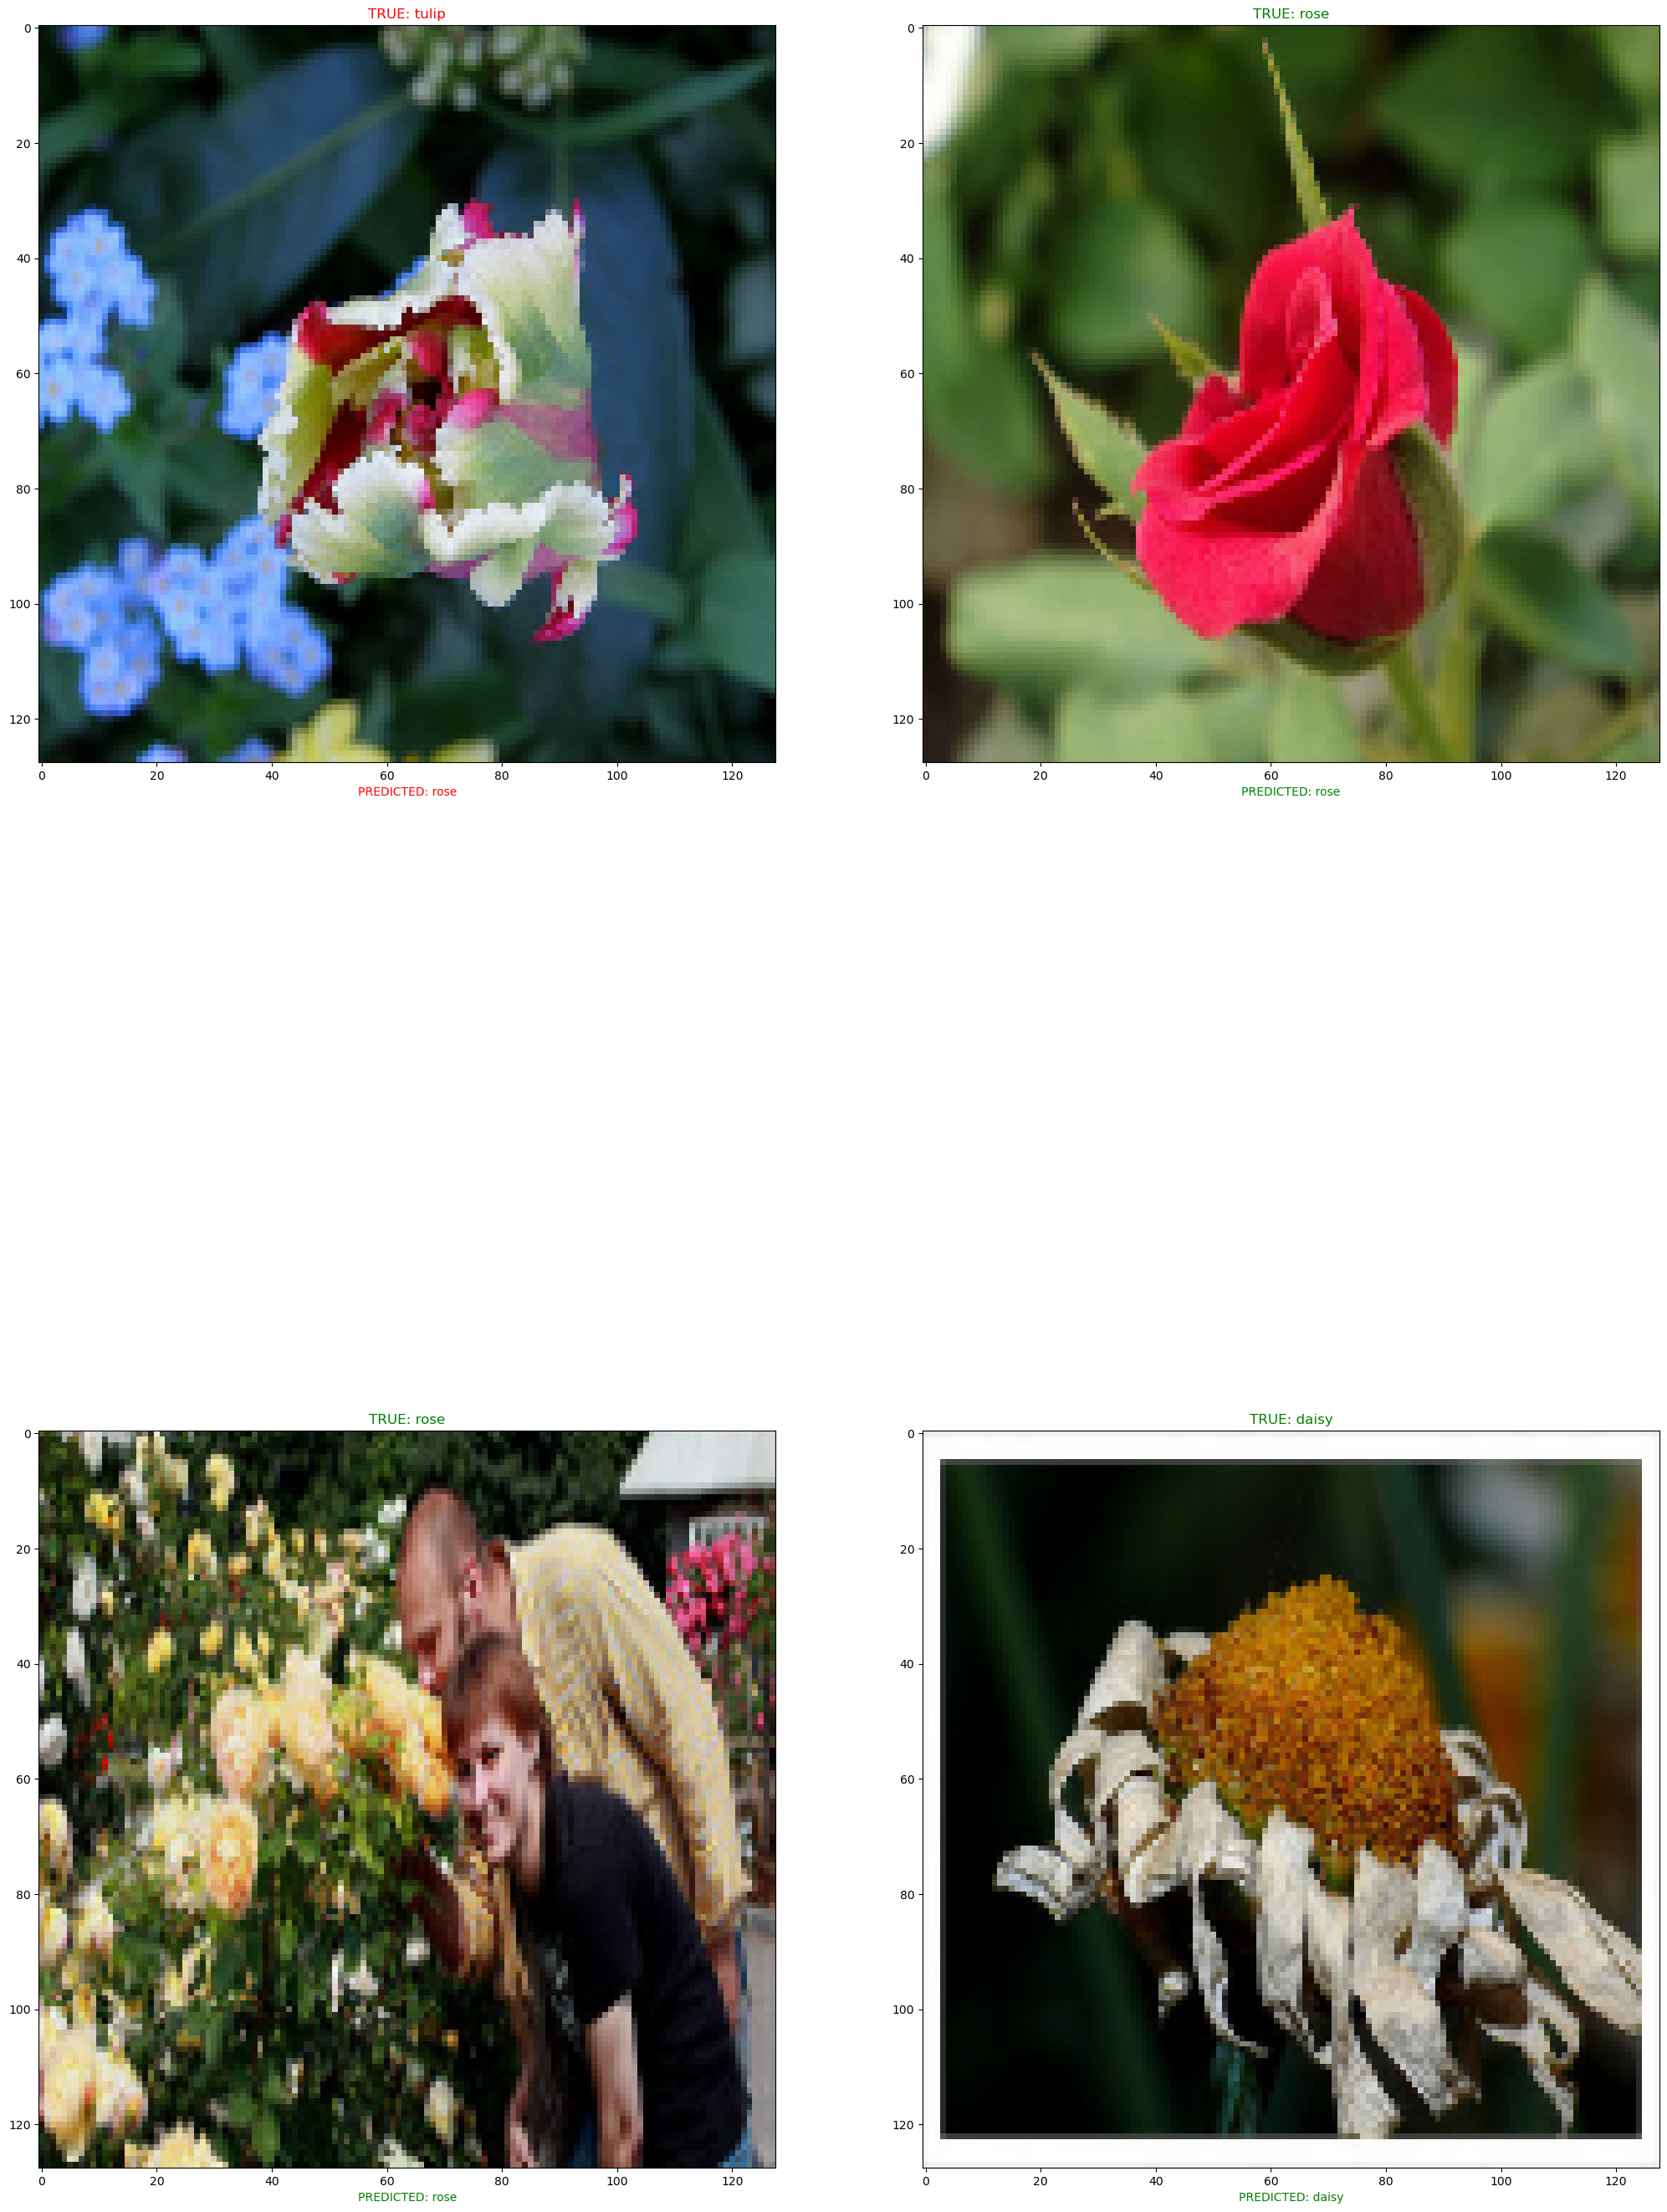

In [22]:
categories = np.sort(os.listdir(folder_dir)) # klasördeki sınıf adlarını lfebetik yapıyor  
fig, ax = plt.subplots(2,2, figsize=(25, 40))  # 2*2  lık grafik ızgırası ve 36 fototğraf gösteriri 

for i in range(2):
    for j in range(2):
        k = int(np.random.random_sample() * len(x_test))   #Rastegele bir örnek seçer 
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(x_test)[k])]):   # Tahmin doğruysa yeşil , yanlışsa kırmız 
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='green')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')   # Hücreinin başlığına gerçek sınıfı yazar 
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='red') # tahmin edilen sınıf yazar 
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')  # Görüntüyü hücreye çizer 

# Conclusion :
We built a CNN to classify five flower types and achieved ~70–72% validation accuracy. Most errors occur between visually similar classes (e.g., tulip vs. rose). Next steps: add more data and augmentation, use larger input (e.g., 224×224), or apply transfer learning (MobileNetV2/ResNet) to boost accuracy.